In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
from   sklearn import datasets
import pylab
import scipy.stats as stats

# data graphing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

from scipy import stats
import statistics
# Load a CSV file
data = pd.read_csv('lake_mercury_data.csv')

1) Determine if the average mercury is different for fish in lakes with acidic water compared to fish in lakes with basic water.

In [2]:
data.head()

,ID,Lake,Alkalinity,pH,pH_cat,Calcium,Calcium_cat,Chlorophyll,Avg_Mercury,Mercury_cat
0,1,Alligator,5.9,6.1,acid,3.0,low,0.7,1.23,unsafe
1,2,Annie,3.5,5.1,acid,1.9,low,3.2,1.33,unsafe
2,3,Apopka,116.0,9.1,base,44.1,high,128.3,0.04,acceptable
3,4,Blue Cypress,39.4,6.9,acid,16.4,medium,3.5,0.44,acceptable
4,5,Brick,2.5,4.6,acid,2.9,low,1.8,1.20,unsafe


In [8]:
acid_mer = data[data['pH_cat']=='acid']['Avg_Mercury']

In [7]:
base_mer = data[data['pH_cat']=='base']['Avg_Mercury']

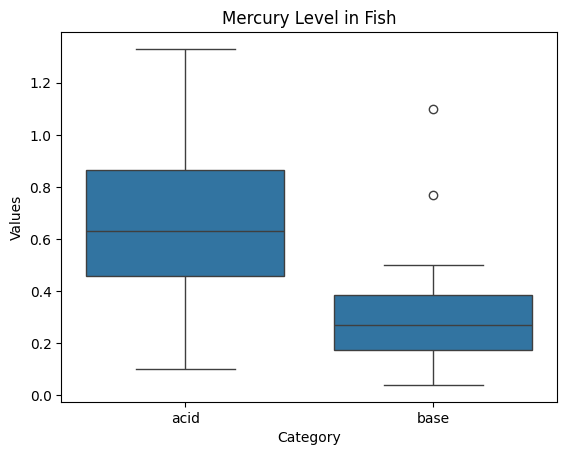

In [5]:
sns.boxplot(x='pH_cat', y='Avg_Mercury', data=data)

# Customize the plot
plt.title('Mercury Level in Fish')
plt.xlabel('Category')
plt.ylabel('Values')
plt.show()

This boxplot visualizes the distribution of the variable Avg_Mercury (average mercury levels in fish) across two categories (acid and base) represented by the variable pH_cat.
*  x-axis (pH_cat): Represents the categories (acid and base).

*  y-axis (Avg_Mercury): Represents the average mercury levels.


| Category: Acid                           |   Category: Base |
|-----------------                         |-----------------|
| Median: Around 0.7.                      | Median: Around 0.3.     |
| IQR: Spans from approximately 0.5 to 0.9.| IQR: Spans from approximately 0.2 to 0.4.     |
|Whiskers: Extend from around 0.0 to 1.2.  |Whiskers: Extend from around 0.0 to 0.5.
|No outliers       |Outliers: Two outliers above the whisker (~0.6).


The boxplot visually summarizes the distribution of mercury levels for each category:

*   Fish in the acid category have a higher median mercury level (0.7) compared to the base category (0.3).

*   The acid category shows a wider spread of mercury levels (larger IQR and whisker range) than the base category.

*   Acid category is slightly right-skewed while Base category is approximately symmetric after removing outliers.






In [10]:
base_mer_new = base_mer[base_mer < 0.6]

Above step ensures that extreme values (outliers) in the base_mer variable are excluded from further analysis.

The F-test for unequal variances (also known as Levene's test or the test for homogeneity of variances) is used to compare the variances of two samples to determine if they are significantly different. This test can handle situations where the sample sizes are unequal.

**Purpose:**
To test the

$H_0: \sigma_1^2=\sigma_2^2$ (The variances of two populations are equal)

$H_1:\sigma_1^2\neq\sigma_2^2$ (The variances of two populations are not equal)

**Test Statistic:**
The test statistic is the ratio of the sample variances:

$F = \frac{s_1^2}{s_2^2}$

where:

*   ${s_1^2}=0.1015$ and ${s_2^2}=0.0202$ are the sample variances.
*   By convention, the larger variance is usually placed in the numerator to ensure $F\geq1$.

**Distribution:**

 The test statistic $F$ follows an F-distribution with degrees of freedom $df_1 = n_1-1 = 30$ and $df_2 = n_2-1 =19$ , where $𝑛_1$ and $𝑛_2$ are the sample sizes of the two groups.

**Conditions:**

* The data in each sample should be approximately normally distributed. Here I assume that the population mercury levels are normally distributed.
* The samples should be independent.

**Interpretation:**

The calculated F-statistic(5.01) is greater than the critical value(2.07) from the F-distribution table (or the p-value(0.00027) is less than the significance level, typically 0.05), therefore we reject $H_0$ and conclude that the variances are significantly different.  

This test is particularly useful when designing experiments or analyzing datasets where variance homogeneity is a key assumption for further analysis(e.g., t-tests or ANOVA).

I have included the calculations of these steps below.

In [7]:
acid_mer.count()

31

In [8]:
base_mer_new.count()

20

In [9]:
f_value = acid_mer.var()/base_mer_new.var()
f_value

5.0095767111283225

In [10]:
cdf_value = stats.f.cdf(f_value, 30, 19)
print(cdf_value)

0.9997272969437442


In [11]:
p_value = 1-cdf_value
p_value

0.0002727030562558186

Below I have also included the critical value calculation for this test as an alternative to the p-value.

In [12]:
from scipy.stats import f

# Input parameters
alpha = 0.05  # Significance level
dof_numerator = 30  # Degrees of freedom for numerator
dof_denominator = 19  # Degrees of freedom for denominator

# Calculate the critical value
f_critical = f.ppf(1 - alpha, dfn=dof_numerator, dfd=dof_denominator)

print(f"Critical value for F-distribution: {f_critical}")

Critical value for F-distribution: 2.071185883598435


Now we should run a t-test for comparing population means with unequal variances.

**Steps to Run a t-test for Unequal Variances(Welch's t-test):**

**Hypotheses:**

$H_0: \mu_1^2=\mu_2^2$ (The population means are equal)

$H_1:\mu_1^2\neq\mu_2^2$ (The population means are not equal)

**Calculate the Test Statistic:**

The formula for Welch's t-test is:

 $t = \frac{\bar{X}_1-\bar{X}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$ = 6.525476878124273

*  Sample means $\bar{X}_1=0.6787$ and $\bar{X}_2=0.2515$
*  Sample variances ${s_1^2}=0.1015$ and ${s_2^2}=0.0202$
*  Sample sizes $n_1 = 31$ and $n_2 = 20$


**Degrees of Freedom (Welch-Satterthwaite Equation)**

Because the variances are unequal, the degrees of freedom are approximated as:

$df = \frac{\big(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\big)^2}
{\frac{\big(\frac{s_1^2}{n_1}\big)^2}{n_1-1}+\frac{\big(\frac{s_2^2}{n_2}\big)^2}{n_2-1}}$ = 44.68

This produces the value of the degrees of freedom, which is used to determine the critical value or p-value from the corresponding t-distribution.

**Compare to the Critical Value or Compute the p-value:**

*  Use the calculated t-statistic and df to find the p-value.
*  The  p-value $5.3257\times 10^{-8}$ is less than the significance level (0.05), reject $H_0$. There is a significant difference between the population means of mercury levels in acid and base water.

**Steps to Calculate the Confidence Interval**

* Calculate the Difference in Means: Difference= $\bar{X}_1-\bar{X}_2$ = 0.4272

* Compute the Standard Error: $SE =\sqrt{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})}$
* Find the Critical t-Value: For the desired confidence level (e.g., 95%), $t_{α/2,df}$ = 2.0145 using a t-distribution with df of 44.68.
* Calculate the Margin of Error: ME = $t_{α/2,df}$.SE = 0.1318
* Determine the Confidence Interval: CI = $(\bar{X}_1-\bar{X}_2)\pm$ ME = (low=0.29, high=0.56)

**Interpretation**

We are 95% confident that the true difference in population mean difference lies between 0.29 and 0.56 ppm. That is 95% of the time mean mercury level in acid lakes is between 0.29 and 0.56 ppm higher than mean mercury level in base lakes.



In [19]:
ratio1  = acid_mer.var()/31
ratio2 = base_mer_new.var()/20

numerator = (ratio1+ratio2)**2

denom = ratio1**2/30+ratio2**2/19

numerator/denom

44.682366758789215

In [20]:
test_results = stats.ttest_ind(acid_mer, base_mer_new, equal_var= False)
print(test_results.pvalue)

5.325724712105933e-08


In [21]:
test_results.confidence_interval(confidence_level=0.95)


ConfidenceInterval(low=0.29532455545229963, high=0.5590947993864099)

In [22]:
test_results

TtestResult(statistic=6.525476878124273, pvalue=5.325724712105933e-08, df=44.68236675878921)

Below I am also showing manual calcualtion of p-value and the critical value for this test.

In [23]:
from scipy.stats import t

pval = (1-t.cdf(6.525476878124273, 44.68236675878921))*2
pval

5.32572470568482e-08

In [24]:
t.ppf(1-0.025 , 44.68236675878921)

2.014498639551717

2) Determine if there is a relationship between the calcium categories and whether or not the mercury level in the fish is acceptable.





**Steps to run a Chi-Square Test**

The Chi-Square Test of Independence is a statistical test used to determine whether two categorical variables are significantly associated or independent. The test evaluates whether the observed frequencies in a contingency table deviate significantly from the expected frequencies under the assumption of independence.

**Hypotheses:**

$H_0:$ (There is no association between Calcium_cat and Mercury_cat and variables are independent.)

$H_1:$ (There is an association between Calcium_cat and Mercury_cat and variables are not independent.)

* Observed Frequencies: The observed frequencies are taken from the contingency table, which shows the counts of each combination of the categories for Calcium_cat and Mercury_cat.

* Expected Frequencies are calculated assuming independence of the two variables.

* The expected frequency for each cell in the contingency table is given by:

    $E_{ij} = \frac{(RowTotal_i)×(Column Total_j )}{Grand Total}$

* In the results, the expected frequencies matrix:  

**Chi-Square Statistic:**

* This measures the discrepancy between observed $O_{ij}$ and expected $E_{ij}$ frequencies:

  $\chi^2 = \sum \frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

  For this test, the calculated Chi-Square Statistic is:$\chi^2$ = 6.5869

* A larger Chi-Square statistic indicates a greater deviation from independence.

**Degrees of Freedom (df):**
* Calculated based on the number of rows (r) and columns (c) in the contingency table: df=(r−1)×(c−1)

  In this case, r=3 (rows) and c=2 (columns), so: df=(3−1)×(2−1)=2

**P-value:**

* The p-value is computed from the Chi-Square distribution with the calculated df. For this test: p=0.0371.
* The p-value indicates the probability of observing such a Chi-Square value (or larger) under the null hypothesis.

**Interpretation of Results**

* Chi-Square Statistic: A value of 6.5869 indicates moderate deviation from the expected frequencies.
* Degrees of Freedom: With df=2, the test accounts for the number of categories in each variable.
* The p-value is 0.0371, which is less than the significance level (${α}$=0.05). Since p-value < 0.05, we reject the null hypothesis.
* The test results indicate a statistically significant association between Calcium_cat and Mercury_cat.
* This means that the levels of calcium are not independent of the levels of mercury in the fish in these lakes.


In [25]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Calcium_cat'], data['Mercury_cat'])


# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 6.586925287356323
P-value: 0.03712507566755089
Degrees of Freedom: 2
Expected Frequencies:
 [[ 7.66037736  6.33962264]
 [ 9.8490566   8.1509434 ]
 [11.49056604  9.50943396]]


The following code filters the data based on conditions in the Calcium_cat column and analyzes the distribution of values in the Mercury_cat column for the filtered subsets. It summarizes the unique values along with their respective counts.

**Contingency table with observed values**


\begin{array}{|c|c|c|c|}
\hline
\textbf{Calcium_cat} & \textbf{acceptable} & \textbf{unsafe} & \textbf{Total} \\
\hline
low & 6 & 12  & 18 \\
\hline
medium & 12 & 9 & 21 \\
\hline
high & 11 & 3 & 14 \\
\hline
Total & 29 & 24 & 53 \\
\hline
\end{array}

**Expected values**


\begin{array}{|c|c|c|}
\hline
\textbf{Calcium_cat} & \textbf{acceptable} & \textbf{unsafe} \\
\hline
low & 9.8490566 & 8.1509434   \\
\hline
medium & 11.49056604  & 9.50943396  \\
\hline
high & 7.66037736 & 6.33962264  \\
\hline
\end{array}

In [26]:
Calcium_cat_law = data[data['Calcium_cat']=='low']['Mercury_cat']
values, counts = np.unique(Calcium_cat_law, return_counts=True)
values, counts


(array(['acceptable', 'unsafe'], dtype=object), array([ 6, 12]))

In [27]:
Calcium_cat_medium = data[data['Calcium_cat']=='medium']['Mercury_cat']
values, counts = np.unique(Calcium_cat_medium, return_counts=True)
values, counts

(array(['acceptable', 'unsafe'], dtype=object), array([12,  9]))

In [28]:
Calcium_cat_high = data[data['Calcium_cat']=='high']['Mercury_cat']
values, counts = np.unique(Calcium_cat_high, return_counts=True)
values, counts

(array(['acceptable', 'unsafe'], dtype=object), array([11,  3]))

3) Develop a model to predict Mercury levels using the other variables as predictors.

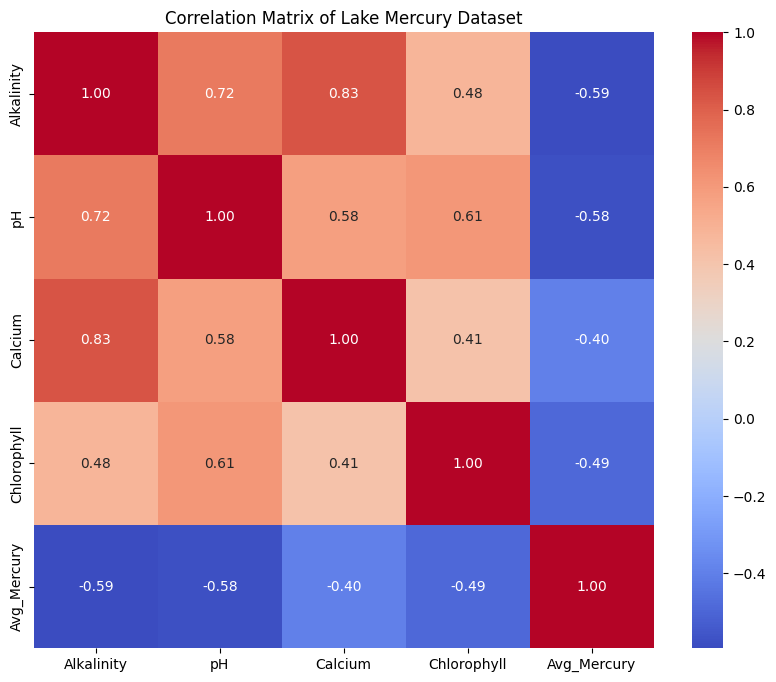

In [33]:
# Compute the correlation matrix
correlation_matrix = data.drop(['ID', 'Lake','pH_cat','Calcium_cat','Mercury_cat'],axis=1).corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Lake Mercury Dataset")
plt.show()

* Alkalinity, Calcium, pH, and Chlorophyll are all significantly correlated with Mercury levels. However, Alkalinity shows a strong positive correlation with Calcium (0.83) and pH (0.72). Due to this multicollinearity between Alkalinity, Calcium, and pH, we have decided to exclude Alkalinity from the analysis. Instead, we will use Calcium, pH, and Chlorophyll as predictors to model Mercury levels with linear regression.



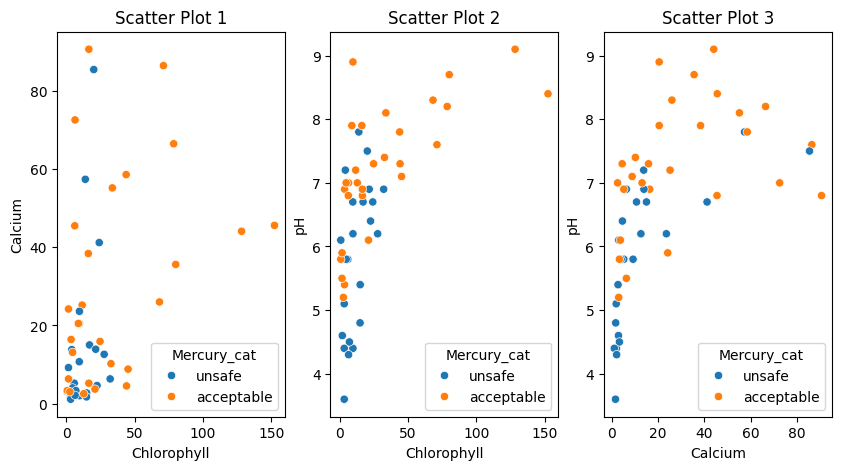

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
# Scatter plot with color and size

sns.scatterplot(ax=axes[0], x='Chlorophyll', y='Calcium',hue='Mercury_cat', data= data)
axes[0].set_title('Scatter Plot 1')

sns.scatterplot(ax=axes[1], x='Chlorophyll', y='pH',hue='Mercury_cat', data= data)
axes[1].set_title('Scatter Plot 2')

sns.scatterplot(ax=axes[2], x='Calcium', y='pH',hue='Mercury_cat', data= data)
axes[2].set_title('Scatter Plot 3')
# Add labels and title


# Show the plot
plt.show()


Calcium and Chlorophyll show little to no linear association. However, pH appears to be linearly correlated with both Calcium and Chlorophyll. We will monitor the effect of the pH variable as we proceed with the analysis.

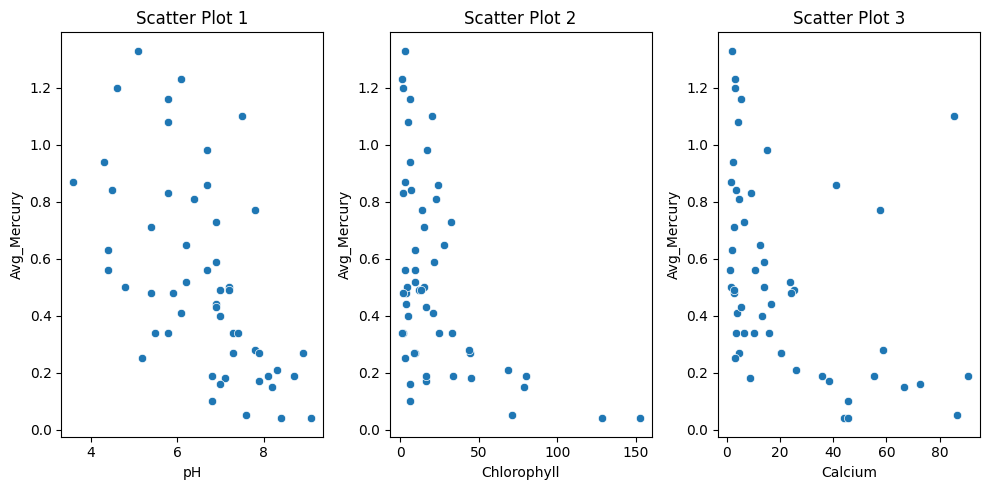

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
# Scatter plot with color and size

sns.scatterplot(ax=axes[0], x='pH', y='Avg_Mercury', data= data)
axes[0].set_title('Scatter Plot 1')

sns.scatterplot(ax=axes[1], x='Chlorophyll', y='Avg_Mercury', data= data)
axes[1].set_title('Scatter Plot 2')

sns.scatterplot(ax=axes[2], x='Calcium', y='Avg_Mercury', data= data)
axes[2].set_title('Scatter Plot 3')
# Add labels and title
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
print(np.corrcoef(data['Chlorophyll'], data['Avg_Mercury'])[0,1])
print(np.corrcoef(data['Calcium'], data['Avg_Mercury'])[0,1])
print(np.corrcoef(data['pH'], data['Avg_Mercury'])[0,1])

-0.4913748125998548
-0.4006795836482771
-0.575400121501555


Since Mercury levels tend to have a high variance for large  Chlorophyll and Calcium values, we log transform the Mercury variable.

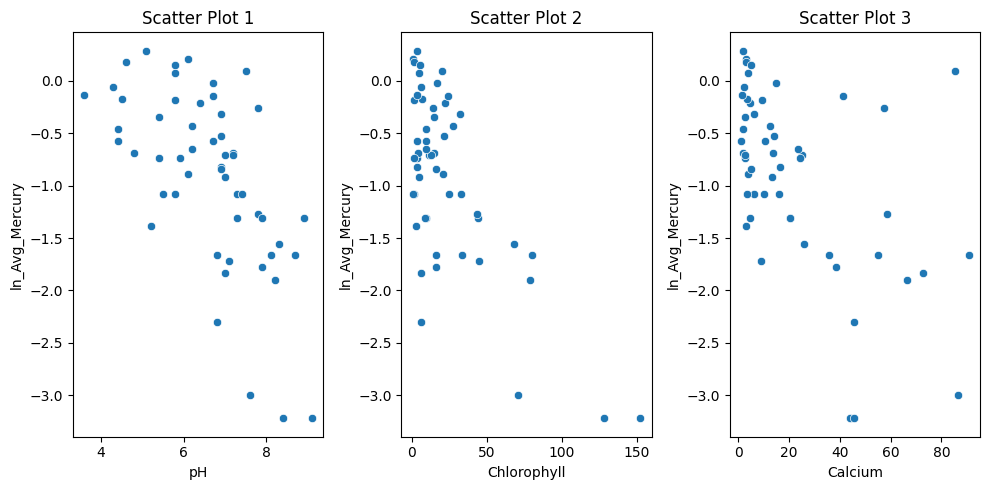

In [17]:
data['ln_Avg_Mercury'] = np.log(data['Avg_Mercury'])

fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
# Scatter plot with color and size

sns.scatterplot(ax=axes[0], x='pH', y='ln_Avg_Mercury', data= data)
axes[0].set_title('Scatter Plot 1')

sns.scatterplot(ax=axes[1], x='Chlorophyll', y='ln_Avg_Mercury', data= data)
axes[1].set_title('Scatter Plot 2')

sns.scatterplot(ax=axes[2], x='Calcium', y='ln_Avg_Mercury', data= data)
axes[2].set_title('Scatter Plot 3')
# Add labels and title
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
print(np.corrcoef(data['Chlorophyll'], data['ln_Avg_Mercury'])[0,1])
print(np.corrcoef(data['Calcium'], data['ln_Avg_Mercury'])[0,1])
print(np.corrcoef(data['pH'], data['ln_Avg_Mercury'])[0,1])

-0.7071428841025784
-0.532045509775713
-0.6172318281625389


Log tranforming improves the linear correlation between the predictors and the mercury levels. Next we model the Mercury levels using a multiple linear regression.



**Model Summary:**

* R-squared: 0.587 – Indicates that approximately 58.7% of the variance in  ln_Avg_Mercury is explained by the predictors.
* Adj. R-squared: 0.562 – Adjusted for the number of predictors; accounts for model complexity.
* F-statistic: 23.24 – Tests the overall significance of the model.
* Prob(F-statistic):  $1.69\times10^{-9}$– Indicates the model is statistically significant (very low p-value).

**Coefficients Table:**

* Intercept (0.3573): The expected value of ln_Avg_Mercury when all predictors are zero.
* Chlorophyll (-0.0138): A statistically significant negative relationship (p < 0.05); for a unit increase in Chlorophyll, ln_Avg_Mercury decreases by 0.0138, holding other variables constant.
* Calcium (-0.0074): Suggests a negative relationship, but the p-value (0.058) is slightly above the standard 0.05 threshold, so it is marginally insignificant,holding other variables constant.
* pH (-0.1191): Indicates a negative relationship, but it is not statistically significant (p = 0.165),holding other variables constant.

In [22]:
from statsmodels.formula.api import ols
mul_lm_model = ols('ln_Avg_Mercury ~ Chlorophyll + Calcium + pH', data = data).fit()
print(mul_lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Avg_Mercury   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     23.24
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.69e-09
Time:                        04:36:22   Log-Likelihood:                -41.973
No. Observations:                  53   AIC:                             91.95
Df Residuals:                      49   BIC:                             99.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3573      0.494      0.723      

Since pH shows a weaker evidence of association with ln_Avg_Mercury, we remove it from the moodel and refit the model.

In [23]:
mul_lm_model = ols('ln_Avg_Mercury ~ Chlorophyll + Calcium', data = data).fit()
print(mul_lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Avg_Mercury   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     33.21
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           6.65e-10
Time:                        04:36:24   Log-Likelihood:                -43.026
No. Observations:                  53   AIC:                             92.05
Df Residuals:                      50   BIC:                             97.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3227      0.109     -2.968      

All variables are now statistically significant. There is no notable difference in AIC and BIC values between the previous model and the current model. The Durbin-Watson value is close to 2, indicating little to no autocorrelation in the residuals.

Next we obtain the diagnostic plots to confirm these results.

In [25]:
fitted_vals = mul_lm_model.fittedvalues
residuals = mul_lm_model.resid
std_residuals = mul_lm_model.get_influence().resid_studentized_internal

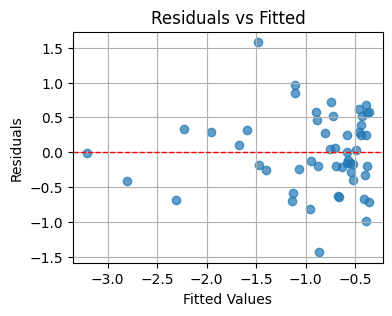

In [27]:
plt.figure(figsize=(4, 3))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

The Residuals vs. Fitted plot indicates that the residuals are fairly evenly distributed across positive and negative ranges for larger fitted values, suggesting no issues with the residuals in this range. However, for smaller fitted values, the residuals are predominantly negative.

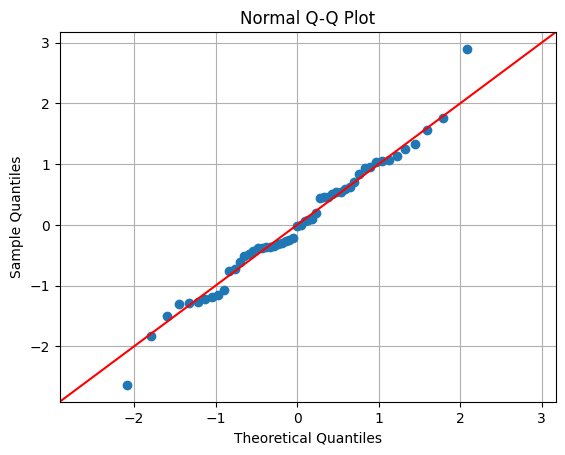

In [29]:
import statsmodels.api as sm
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.grid()
plt.show()

The QQ-plot indicates that the sample quantiles align closely with the theoretical quantiles, suggesting that the residuals are approximately normally distributed.

For simplicity of the notation, we take $\text{Chlorophyll}=X_1$ and $\text{Calcium}=X_2$ and their corresponding **estimated** coefficients to be $\beta_1 = -0.0160$ and $\beta_2 = -0.0098$ respectively. Let $\text{Avg_Mercury}=Y$ and $\beta_0 = -0.3227$ to be the **estimated** intercept coefficient.

Model equation $$\begin{aligned}
\ln(Y)|(X_1, X_2) & = \beta_0 + \beta_1 X_1 + \beta_2 X_2\\
  Y|(X_1, X_2) & = e^{\beta_0 + \beta_1 X_1 + \beta_2 X_2}\\
  Y|(X_1, X_2) , & = A e^{\beta_1 X_1 + \beta_2 X_2}  \text{  where } A = e^{\beta_0}
\end{aligned}$$

Now $\frac{Y|(X_1+1, X_2)}{Y|(X_1, X_2)} = \frac{A e^{\beta_1 (X_1+1) + \beta_2 X_2}}{A e^{\beta_1 X_1 + \beta_2 X_2}} = e^{\beta_1} = e^{-0.0160} = 0.9841$

similarly,
 $\frac{Y|(X_1, X_2+1)}{Y|(X_1, X_2)} = \frac{A e^{\beta_1 X_1 + \beta_2 (X_2+1)}}{A e^{\beta_1 X_1 + \beta_2 X_2}} = e^{\beta_2} = e^{-0.0098}=0.99$


Increasing the value of Chlorophyll by one unit while holding the Calcium level fixed decreases the Avg_Mercury level by nearly 1.59%.


Increasing the value of Calcium by one unit while holding the Chlorophyll level fixed decreases the Avg_Mercury level by nearly 1%.


Final model equation is

$$\text{Expected Avg_Mercury} = 0.7241 e^{-0.016 \times \text{Chlorophyll} - 0.0098 \times \text{Calcium}}$$


In [33]:
import plotly.graph_objects as go
import numpy as np

# Generate grid data for the predicted surface
chlorophyll_range = np.linspace(data['Chlorophyll'].min(), data['Chlorophyll'].max(), 50)
calcium_range = np.linspace(data['Calcium'].min(), data['Calcium'].max(), 50)
chlorophyll_grid, calcium_grid = np.meshgrid(chlorophyll_range, calcium_range)

# Predict values based on the model for the grid
predicted_surface = (
    mul_lm_model.params['Intercept']
    + mul_lm_model.params['Chlorophyll'] * chlorophyll_grid
    + mul_lm_model.params['Calcium'] * calcium_grid
)

# Create an interactive 3D plot
fig = go.Figure()

# Add true values as scatter points
fig.add_trace(
    go.Scatter3d(
        x=data['Chlorophyll'],
        y=data['Calcium'],
        z=data['ln_Avg_Mercury'],
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='True Values'
    )
)

# Add the predicted surface
fig.add_trace(
    go.Surface(
        z=predicted_surface,
        x=chlorophyll_range,
        y=calcium_range,
        colorscale='Viridis',
        opacity=0.7,
        name='Predicted Surface'
    )
)

# Update layout
fig.update_layout(
    title='True Mercury Values with Predicted Surface',
    scene=dict(
        xaxis_title='Chlorophyll',
        yaxis_title='Calcium',
        zaxis_title='ln(Mercury)'
    )
)

# Show the plot
fig.show()

This model may not adequately explain the variability in Mercury levels for prediction purposes, as indicated by the coefficient of determination (R²) of 0.571. This limitation is also apparent in the plot above. It would be better to use a model with lower bias (or higher variance) to achieve more accurate predictions.